# Test `salinity_ferry_track` Module

Render figure objects produced by the `nowcast.figures.comparison.salinity_ferry_track` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

In [1]:
import io
from pathlib import Path

import arrow
import yaml

from salishsea_tools import nc_tools

from nowcast.figures.comparison import salinity_ferry_track

In [2]:
%matplotlib inline

**NOTE**

The next cell mounts the `/results` filesystem on `skookum` and the `/ocean` filesystem locally.
It is intended for use if when this notebook is run on a laptop or other
non-Waterhole machine that has `sshfs` installed 
and mount points for `/results` and `/ocean` available in its root filesystem.

Don't execute the cell if that doesn't describe your situation.

!sshfs skookum:/results /results
!sshfs skookum:/ocean /ocean

In [3]:
# Relevant part of config from nowcast.yaml file
config = '''
    bathymetry: /results/nowcast-sys/NEMO-forcing/grid/bathy_meter_SalishSea2.nc
    coastline: /ocean/rich/more/mmapbase/bcgeo/PNW.mat
    
    observations:
        ferry data': /ocean/jieliu/research/meopar/ONC_ferries/
    
    run:
        results_archive:
            nowcast: /results/SalishSea/nowcast/
'''

config = yaml.load(io.StringIO(config))

In [4]:
run_date = arrow.get('2016-03-23')
run_type = 'nowcast'
dmy = run_date.format('DDMMMYY').lower()

results_home = Path(config['run']['results_archive'][run_type])
results_dir = results_home/dmy

In [5]:
grid_T_hr = nc_tools.dataset_from_path(
    results_dir/'SalishSea_1h_{0}_{0}_grid_T.nc'.format(run_date.format('YYYYMMDD')))

1 loop, best of 1: 207 ms per loop


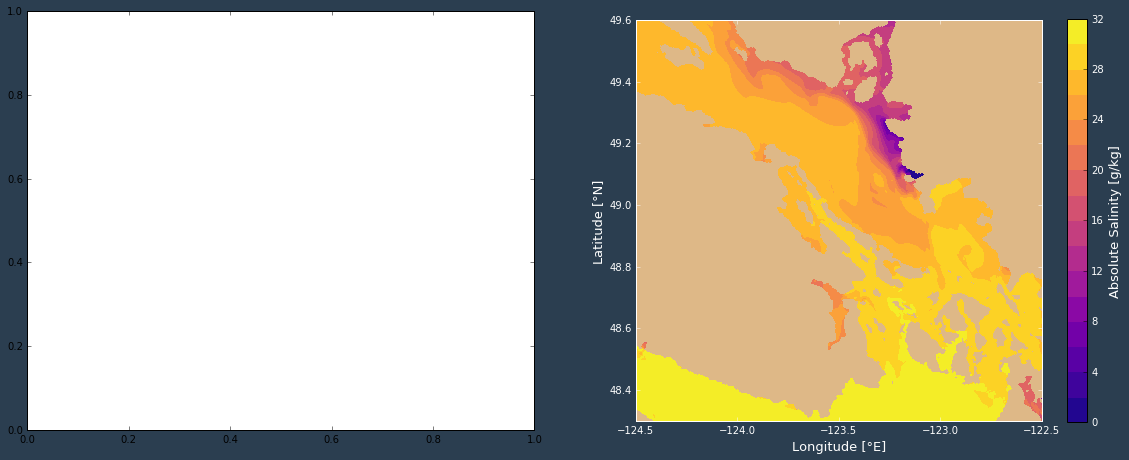

In [50]:
%%timeit -n1 -r1

# Reference rendering of figure

fig = salinity_ferry_track.salinity_ferry_track(grid_T_hr)

1 loops, best of 1: 5.39 s per loop


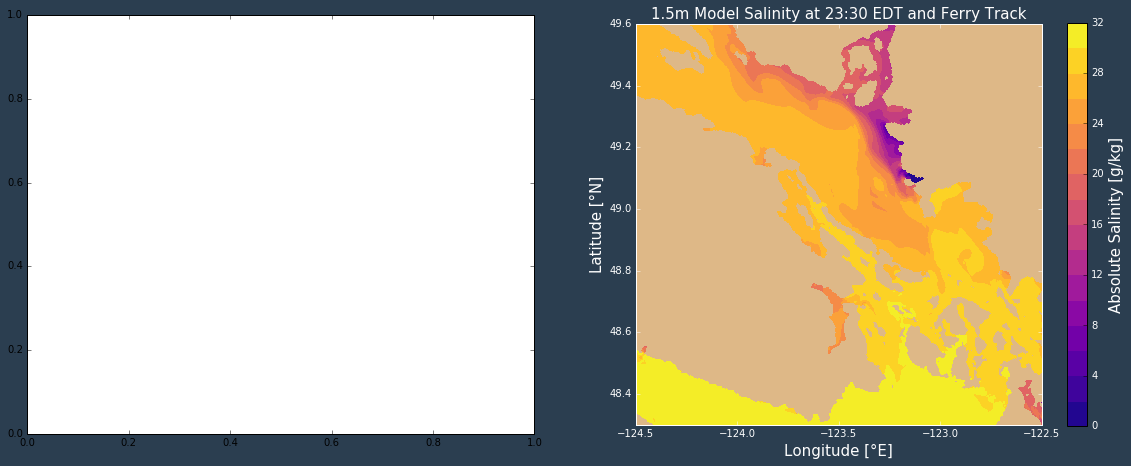

In [7]:
%%timeit -n1 -r1

# Refactored rendering of figure

from importlib import reload
from nowcast.figures import website_theme
reload(salinity_ferry_track)
reload(website_theme)

fig = salinity_ferry_track.salinity_ferry_track(
    grid_T_hr,
    theme=website_theme)